 # Importing libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import os, numpy as npy,pandas as pda
import matplotlib.pyplot as matpl
import matplotlib

from scipy.stats import ttest_ind

from sklearn import feature_selection, model_selection, utils
from sklearn import preprocessing, pipeline, decomposition,metrics, covariance
from sklearn import linear_model, ensemble, neighbors, naive_bayes
import sys


# **Python** **version**

In [ ]:
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


# **Data processing**

In [ ]:
def readbikedata():
    datas=os.listdir()
    for dt in datas:
        if "Bikes" in dt or ".csv" in dt:
            bkf=dt
    bk=pda.read_csv(bkf)
    print("File Outlooks: \n")
    print("File Size: {} bytes".format(os.path.getsize(bkf)))
    bkf_crt = datetime.fromtimestamp(os.path.getctime(bkf))
    print("File Created: {}".format(bkf_crt))
    bkf_mod = datetime.fromtimestamp(os.path.getmtime(bkf))
    print("File last modified: {}".format(bkf_mod))

    print("\nTotal Row: {}\nTotal Features: {}".format(bk.shape[0],bk.shape[1]))
    return bk

In [ ]:
bike=readbikedata()
bike.head()

File Outlooks: 

File Size: 2265012 bytes
File Created: 2023-05-11 08:44:33.537845
File last modified: 2023-05-11 08:44:33.537845

Total Row: 32648
Total Features: 8


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha


In [ ]:
bike.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [ ]:
def infobike(bk):
    print("Information of Features\n")
    print(bk.info())
    print("\nData Statistics\n")
    print(bk.describe())
    print("\nData Distribuion around Mean (Kurtosis)\n")
    print(bk.kurtosis())
    print("\nAssymetric Data Distribuion (Skewness)\n")
    print(bk.skew())


In [ ]:
infobike(bike)

Information of Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32648 non-null  object
 1   price       32648 non-null  int64 
 2   city        32648 non-null  object
 3   kms_driven  32648 non-null  int64 
 4   owner       32648 non-null  object
 5   age         32648 non-null  int64 
 6   power       32648 non-null  int64 
 7   brand       32648 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB
None

Data Statistics

              price     kms_driven           age         power
count  3.264800e+04   32648.000000  32648.000000  32648.000000
mean   6.829542e+04   26344.625184      8.048211    213.511302
std    9.071860e+04   22208.527695      4.031700    134.428868
min    4.400000e+03       1.000000      1.000000    100.000000
25%    2.500000e+04   12000.000000      5.000000    150.000000
50%    4.300000e

# **Data visualization**

In [ ]:
def vizbikeS(bk,ft,nm):
    bike[ft].value_counts()[:10][::-1].plot(kind='barh',color=["#1F45FC","#FF6700","#50C878","#FF1493"])
    matpl.title("Top-10 {}".format(nm),fontsize=20,color="b")
    matpl.xlabel("Count",fontsize=17,color="b")
    matpl.ylabel("{}".format(nm),fontsize=17,color="b")
    matpl.grid()
    matpl.show()

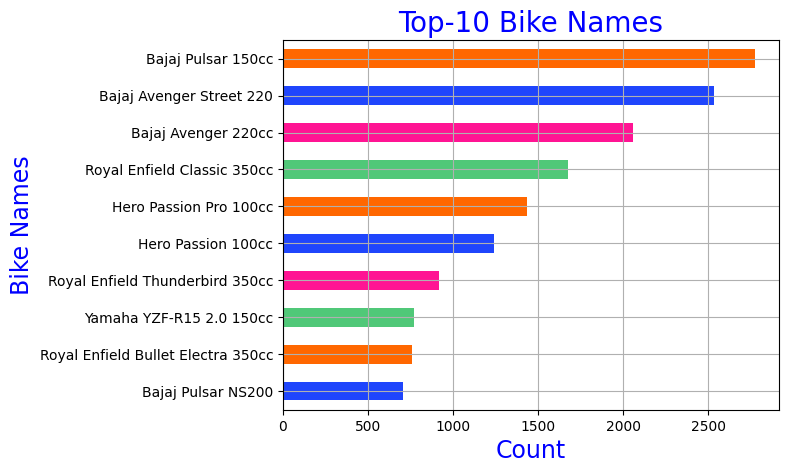

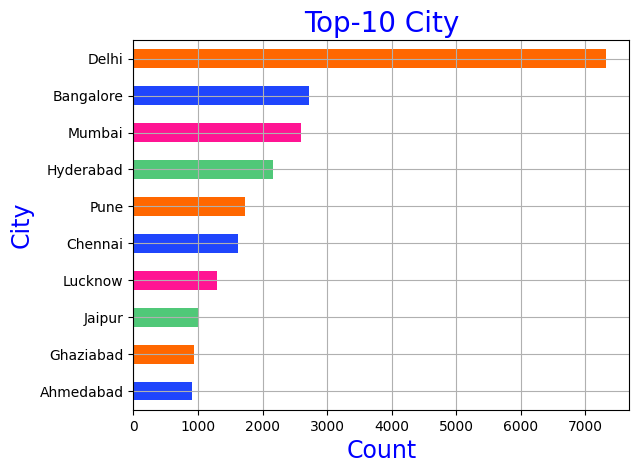

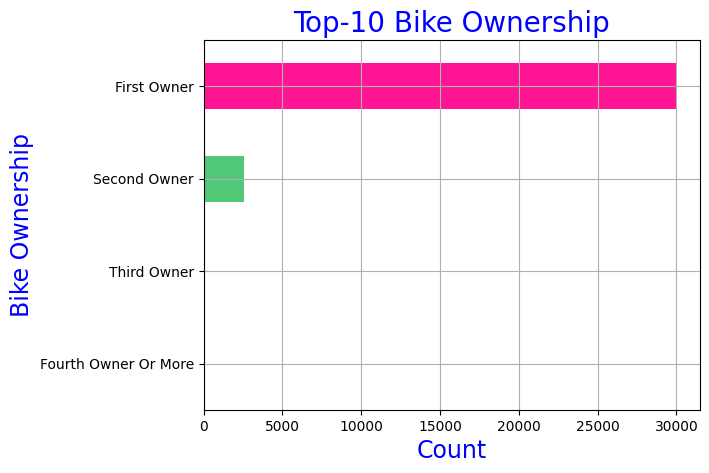

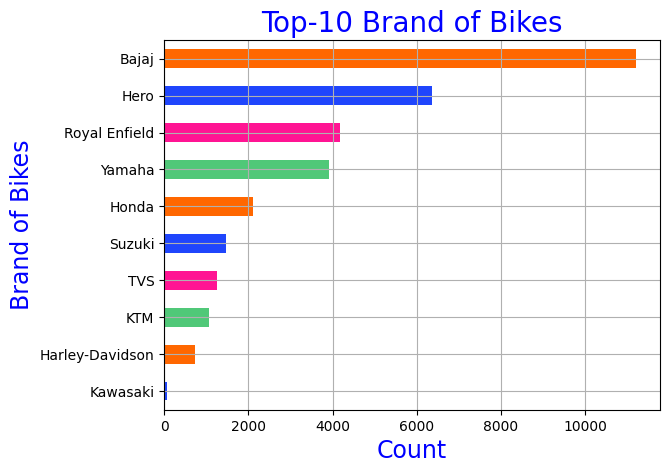

In [ ]:
bkcl=["bike_name","city","owner","brand"]
clnm=["Bike Names","City","Bike Ownership","Brand of Bikes"]
for b in range(len(bkcl)):
    vizbikeS(bike,bkcl[b],clnm[b])

In [ ]:
def bkaggvz(bk,f1,f2,f3):
    ctdta=pda.crosstab(bk[f1],bk[f2],values=bk[f3], aggfunc=npy.mean)[['First Owner','Second Owner']]
    ctdta=ctdta.fillna(0).sort_values(by="Second Owner",ascending=False)[:10]
    ctdta.plot(kind='barh',color=["#FA2A55","#00FA9A"],figsize=(8,4))
    matpl.title("Analysis of {} by {} ({})".format(f1.capitalize(),f2.capitalize(),f3.capitalize()),fontsize=20,color="b")
    matpl.xlabel("{}".format(f3.capitalize()),fontsize=17,color="b")
    matpl.ylabel("{}".format(f2.capitalize()),fontsize=17,color="b")
    matpl.grid()
    matpl.show()

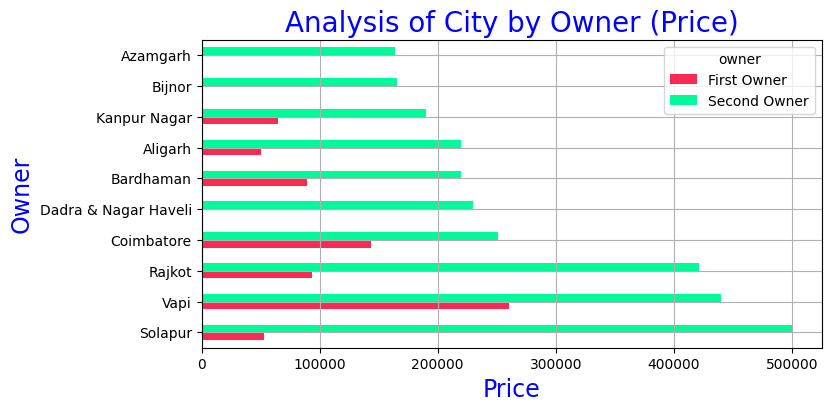

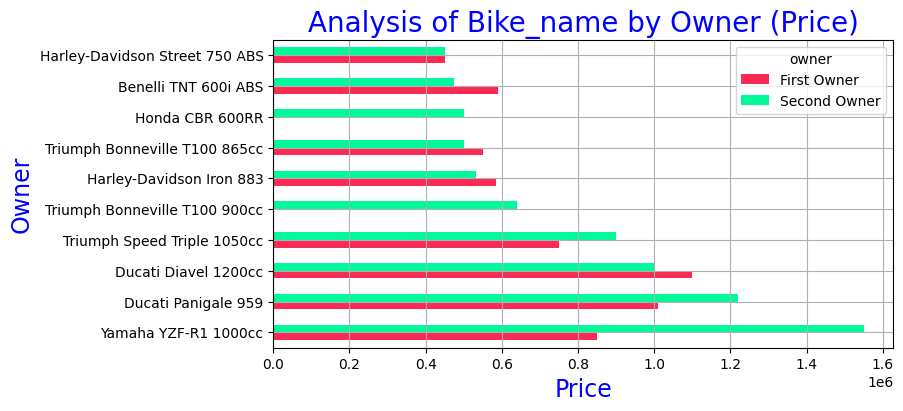

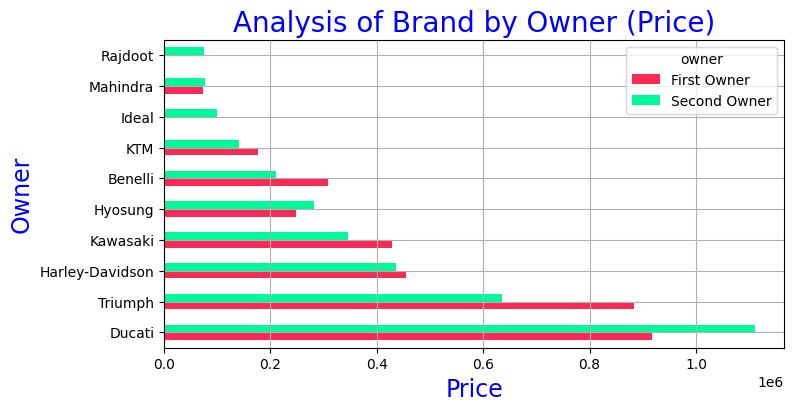

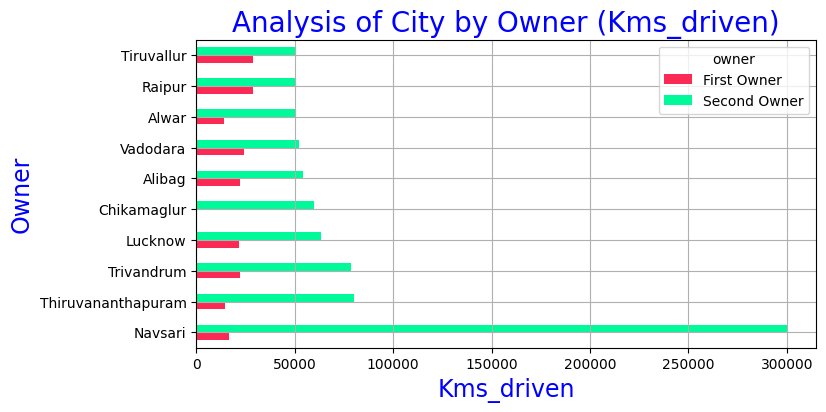

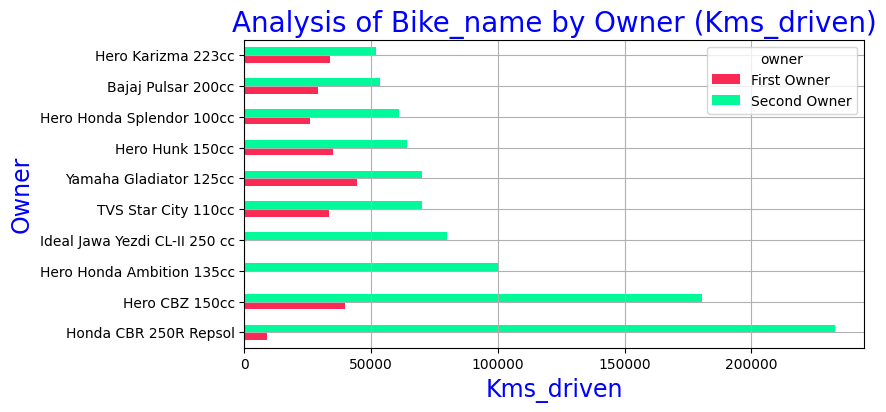

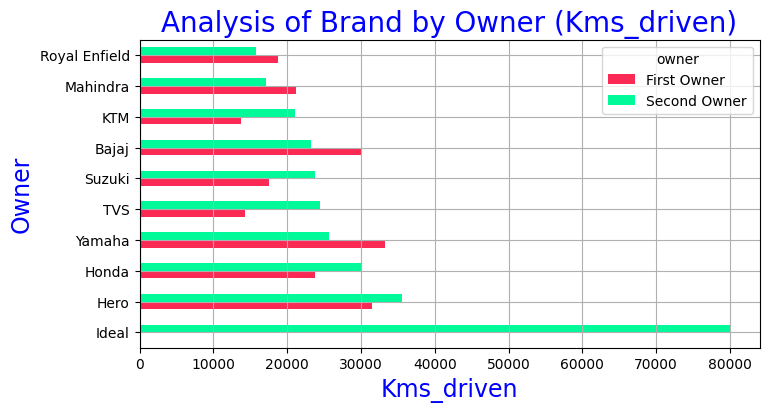

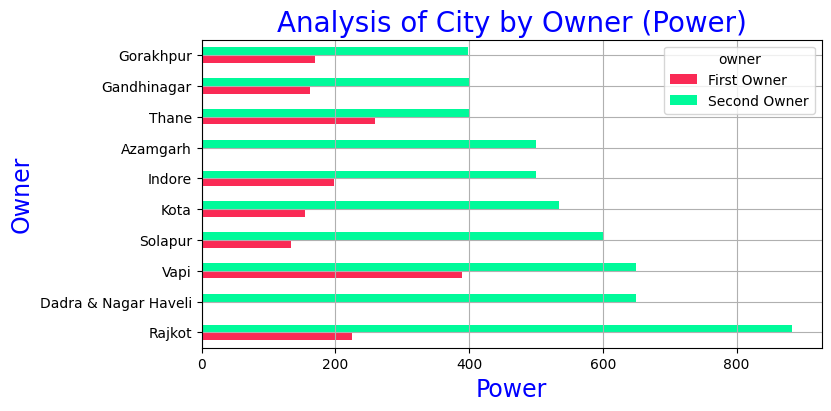

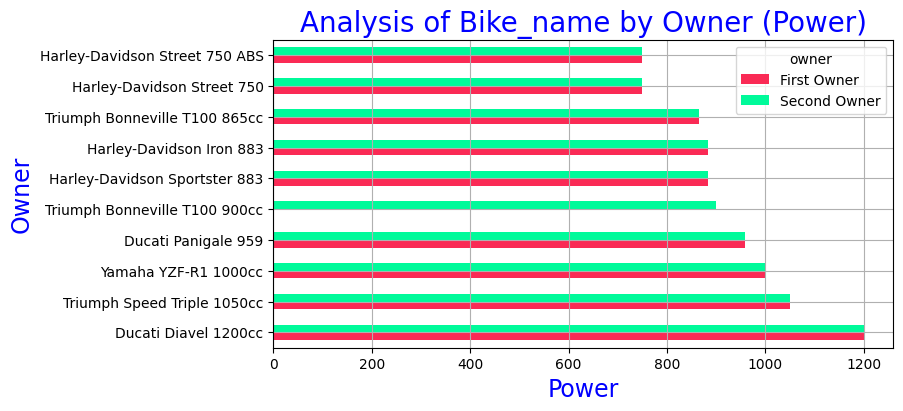

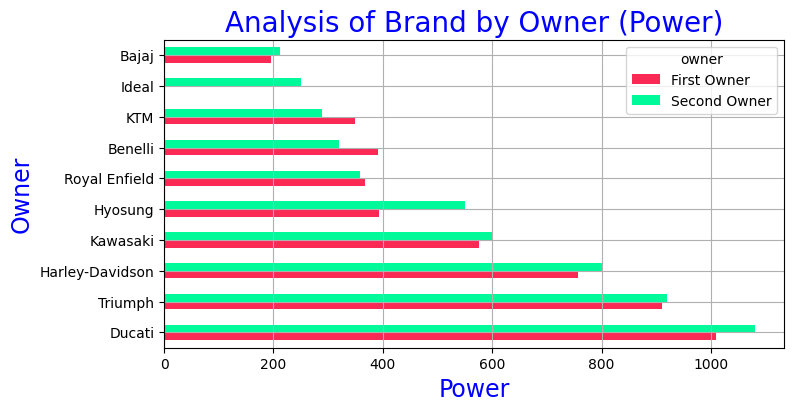

In [ ]:
bkaggvz(bike,'city','owner','price')
bkaggvz(bike,'bike_name','owner','price')
bkaggvz(bike,'brand','owner','price')

bkaggvz(bike,'city','owner','kms_driven')
bkaggvz(bike,'bike_name','owner','kms_driven')
bkaggvz(bike,'brand','owner','kms_driven')

bkaggvz(bike,'city','owner','power')
bkaggvz(bike,'bike_name','owner','power')
bkaggvz(bike,'brand','owner','power')

In [ ]:
def hstbike(bk,f1,f2):
    owun=bk[f1].unique()
    hscl=["#1F45FC","#FF6700","#50C878","#FF1493"]
    for o in range(len(owun)):
        matpl.hist(bk[bk[f1]==owun[o]][f2],color=hscl[o],alpha=0.5)
        matpl.title("Distribution of {} by {}".format(' '.join(f2.split("_")).capitalize(),owun[o]),fontsize=20,color="b")
        matpl.xlabel("{}".format(' '.join(f2.split("_")).capitalize()),fontsize=17,color="b")
        matpl.ylabel("Distribution",fontsize=17,color="b")
        matpl.grid()
        matpl.show()

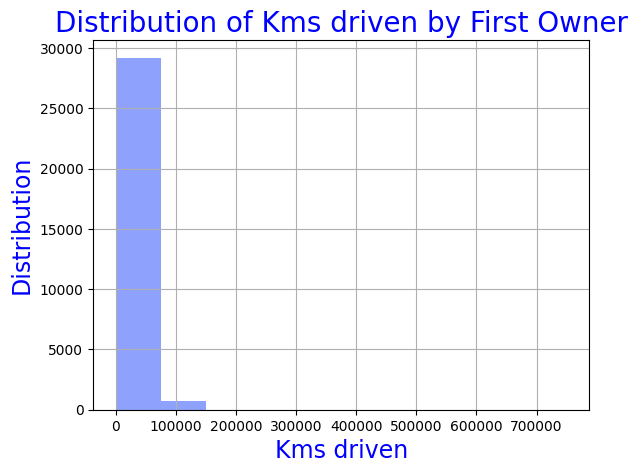

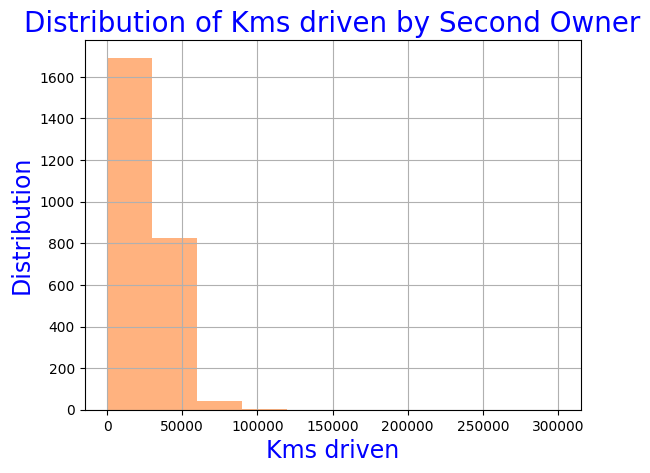

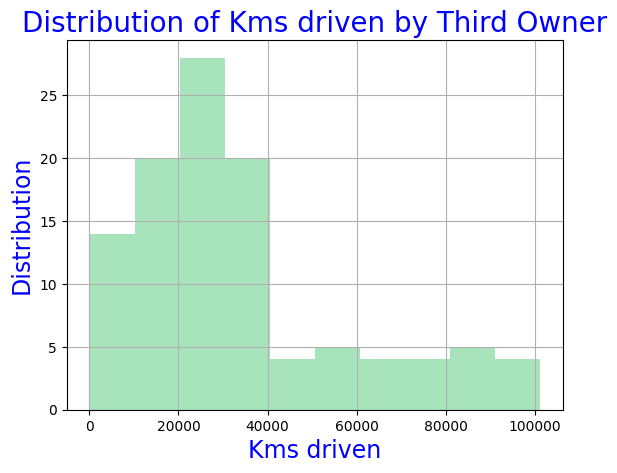

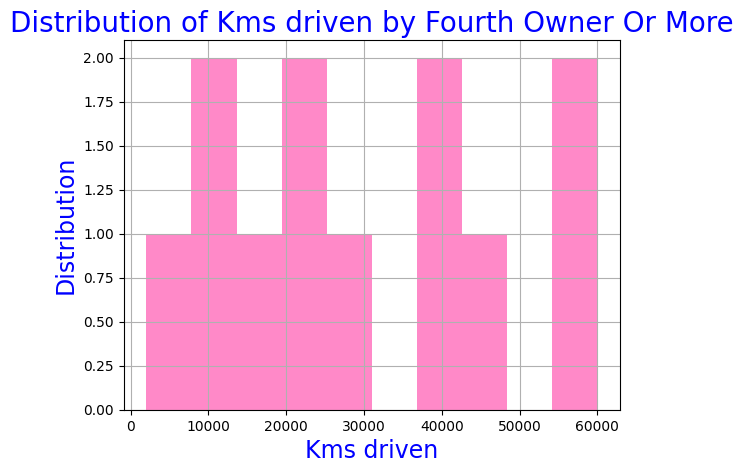

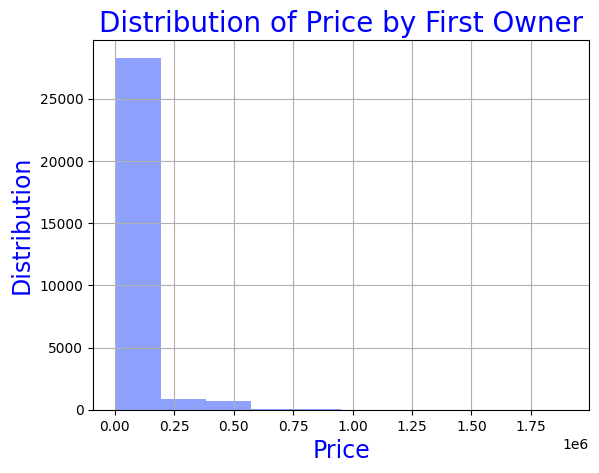

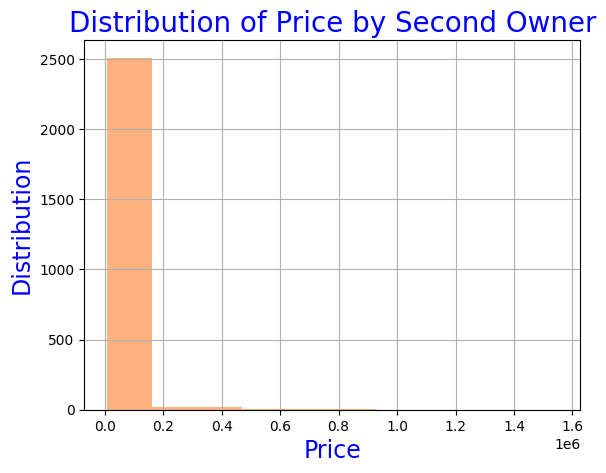

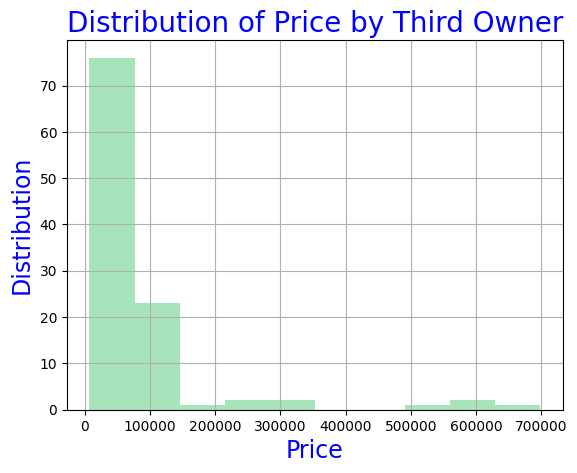

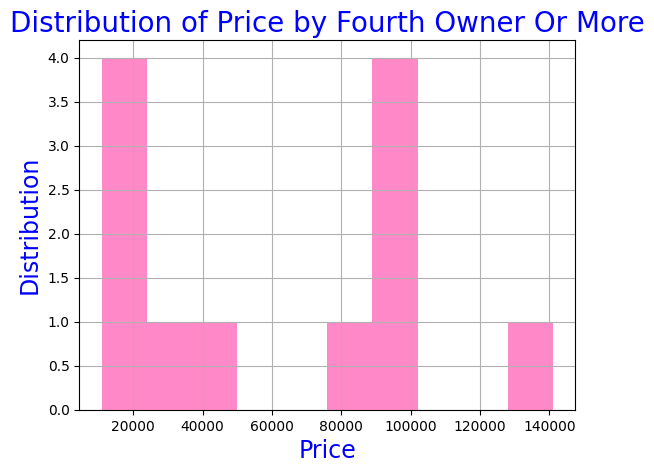

In [ ]:
hstbike(bike,'owner','kms_driven')
hstbike(bike,'owner','price')

In [ ]:
def fetenc(bk):
    catrnft=bk.dtypes[bk.dtypes=='object'].index.tolist()
    le=preprocessing.LabelEncoder()
    bk[catrnft] = bk[catrnft].apply(le.fit_transform)
    return bk

In [ ]:
bike1=bike.copy()
bikeenc=fetenc(bike1)
bikeenc.head(10)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,401,35000,6,17654,0,3,110,19
1,295,119900,118,11000,0,4,350,17
2,411,600000,118,110,0,8,675,20
3,375,65000,44,16329,0,4,180,19
4,426,80000,44,10000,0,3,150,21
5,437,53499,118,25000,0,6,150,21
6,189,85000,118,8200,0,3,160,6
7,168,45000,118,12645,0,3,100,5
8,326,145000,44,9190,0,3,350,17
9,304,88000,118,19000,2,7,500,17


# **Outlier Detection**

In [ ]:
# ref link: https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(medium%20tails)%20are%20mesokurtic.
def outlrdetect(bk):
    krtype=["Mesokurtic","Platykurtic","Leptokurtic"]
    outfreq=["Medium","Low","High"]
    dstr=["Normal","Uniform","Laplace"]
    krt=bk.kurtosis()
    krtfet=krt.index.tolist()
    krtval=krt.tolist()
    des=[]
    print("===============================================")
    for k in range(len(krtfet)):
        print("Details for Feature => {}".format(' '.join(krtfet[k].split("_")).capitalize()))
        if krtval[k]==3:
            print("Type: {}\nOutlier Frequency: {}\nData Distribution: {}".format(krtype[0],outfreq[0],dstr[0]))
            des.append(outfreq[0])
        elif krtval[k]<3:
            print("Type: {}\nOutlier Frequency: {}\nData Distribution: {}".format(krtype[1],outfreq[1],dstr[1]))
            des.append(outfreq[1])
        elif krtval[k]>3:
            print("Type: {}\nOutlier Frequency: {}\nData Distribution: {}".format(krtype[2],outfreq[2],dstr[2]))
            des.append(outfreq[2])
        matpl.figure(figsize=(5,3))
        matpl.title("Boxplot for {}".format(' '.join(krtfet[k].split("_")).capitalize()),fontsize=20,color="b")
        matpl.boxplot(bk[krtfet[k]])
        matpl.grid()
        matpl.show()
        print("===============================================")
    print("Removing Outliers by Feature Normalization with High Outlier Frequency")
    for d in range(len(des)):
        if des[d]!="Low":
            meanval = bk[krtfet[d]].dropna().mean()
            maxval = bk[krtfet[d]].dropna().max()
            minval = bk[krtfet[d]].dropna().min()
            bk[krtfet[d]] = bk[krtfet[d]].apply(lambda x: (x - meanval ) / (maxval -minval ))
    return bk

Details for Feature => Bike name
Type: Platykurtic
Outlier Frequency: Low
Data Distribution: Uniform


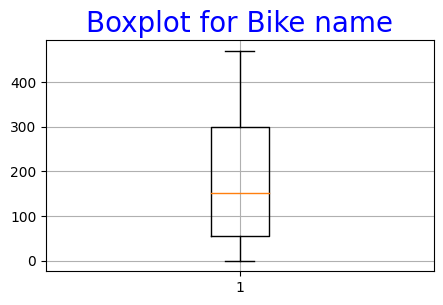

Details for Feature => City
Type: Platykurtic
Outlier Frequency: Low
Data Distribution: Uniform


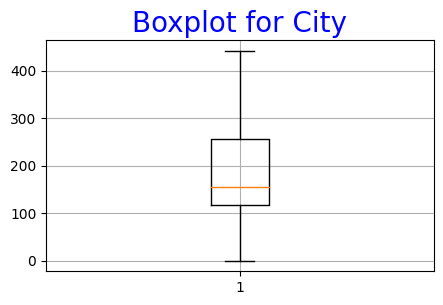

Details for Feature => Kms driven
Type: Leptokurtic
Outlier Frequency: High
Data Distribution: Laplace


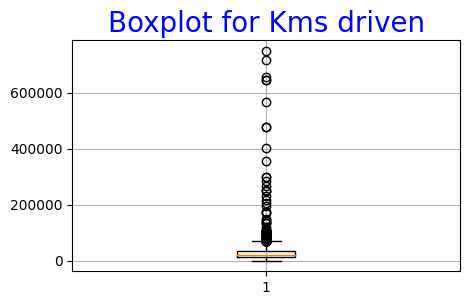

Details for Feature => Owner
Type: Leptokurtic
Outlier Frequency: High
Data Distribution: Laplace


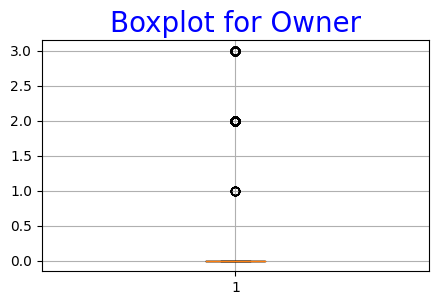

Details for Feature => Age
Type: Leptokurtic
Outlier Frequency: High
Data Distribution: Laplace


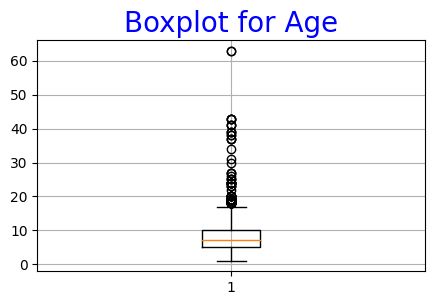

Details for Feature => Power
Type: Leptokurtic
Outlier Frequency: High
Data Distribution: Laplace


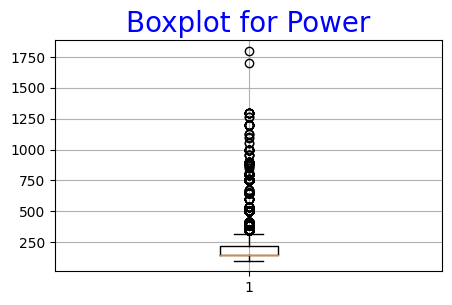

Details for Feature => Brand
Type: Platykurtic
Outlier Frequency: Low
Data Distribution: Uniform


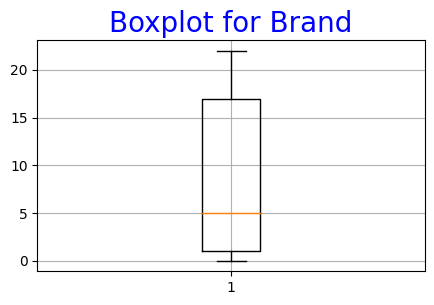

Removing Outliers by Feature Normalization with High Outlier Frequency


,bike_name,city,kms_driven,owner,age,power,brand
0,401,6,-0.011588,-0.055787,-0.081423,-0.060889,19
1,295,118,-0.020460,-0.055787,-0.065294,0.080287,17
2,411,118,-0.034980,-0.055787,-0.000778,0.271464,20
3,375,44,-0.013354,-0.055787,-0.065294,-0.019713,19
4,426,44,-0.021793,-0.055787,-0.081423,-0.037360,21


In [ ]:
bikenrm=outlrdetect(bikeenc.drop('price',axis=1))
bikenrm.head()

In [ ]:
fts,pv,tv=[],[],[]
print("=====================================================")
for cl in range(len(bikenrm.columns.tolist())):
    print("Statistics for {}".format(' '.join(bikenrm.columns.tolist()[cl].split("_"))))
    res = ttest_ind(bike['price'], bikenrm[bikenrm.columns.tolist()[cl]])
    print("T-Value: {}\nP-Value: {}".format(res[0],res[1]))
    fts.append(' '.join(bikenrm.columns.tolist()[cl].split("_")))
    pv.append(res[1])
    tv.append(res[0])
    print("=====================================================")
PTDF=pda.DataFrame({"Feature":fts,"T-Value":tv,"P-Value":pv})
PTDF

Statistics for bike name
T-Value: 135.64898845847563
P-Value: 0.0
Statistics for city
T-Value: 135.68066454183187
P-Value: 0.0
Statistics for kms driven
T-Value: 136.02650497316623
P-Value: 0.0
Statistics for owner
T-Value: 136.02650497288303
P-Value: 0.0
Statistics for age
T-Value: 136.02650497313851
P-Value: 0.0
Statistics for power
T-Value: 136.02650497312177
P-Value: 0.0
Statistics for brand
T-Value: 136.00960741814436
P-Value: 0.0


,Feature,T-Value,P-Value
0,bike name,135.648988,0.0
1,city,135.680665,0.0
2,kms driven,136.026505,0.0
3,owner,136.026505,0.0
4,age,136.026505,0.0
5,power,136.026505,0.0
6,brand,136.009607,0.0


In [ ]:
regmdls=[
    naive_bayes.GaussianNB(),
    linear_model.LinearRegression(),
    neighbors.KNeighborsRegressor(),
    ensemble.RandomForestRegressor()
]
nms=["Naive Bayes",
     "Linear Regression",
     "K-Neighbors",
     "Random Forest"]

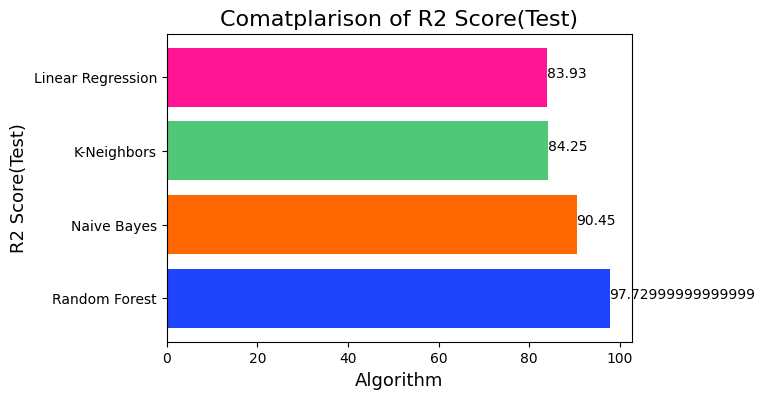

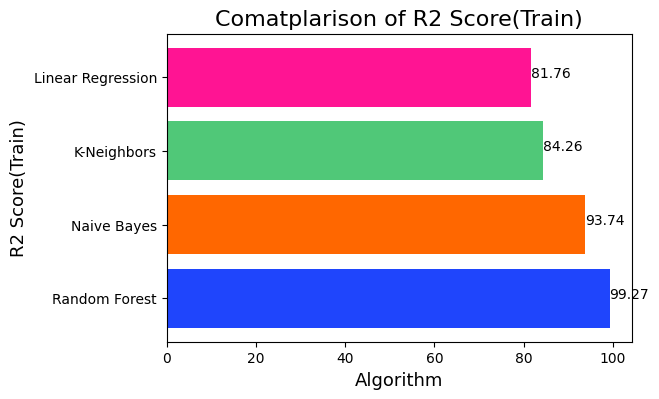

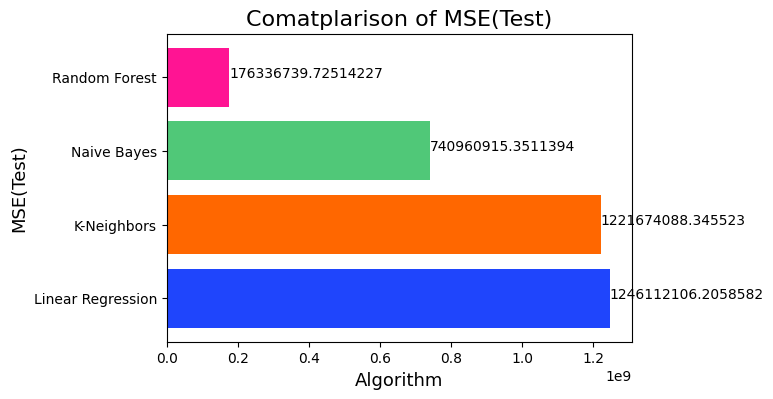

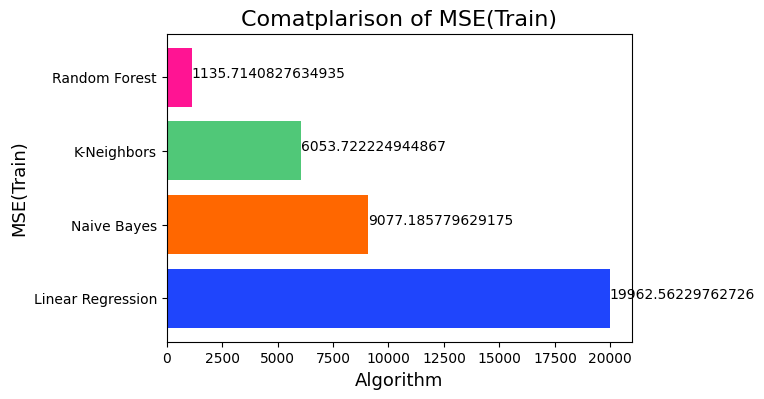

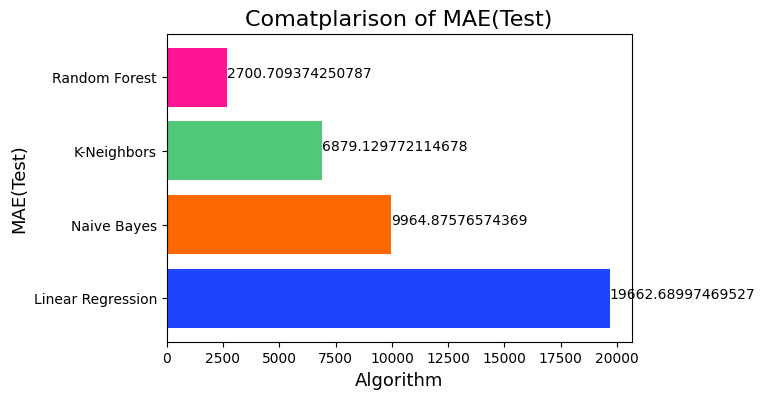

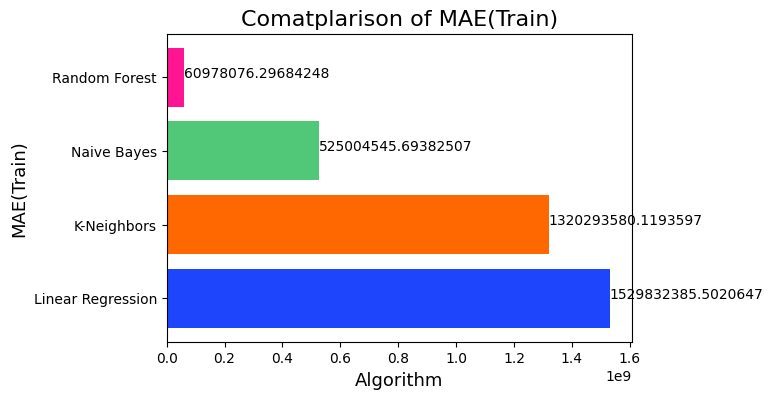

,Algorithm,R2 Score(Test),R2 Score(Train),MSE(Test),MSE(Train),MAE(Test),MAE(Train)
1,Linear Regression,83.93,81.76,1.246112e+09,19962.562298,19662.689975,1.529832e+09
2,K-Neighbors,84.25,84.26,1.221674e+09,6053.722225,6879.129772,1.320294e+09
0,Naive Bayes,90.45,93.74,7.409609e+08,9077.185780,9964.875766,5.250045e+08
3,Random Forest,97.73,99.27,1.763367e+08,1135.714083,2700.709374,6.097808e+07


In [ ]:
def BikePrice(rg, TRX,TSX,TRy,TSy):
    pdm=rg
    pdm.fit(TRX, TRy)
    bike_price_prediction=pdm.predict(TSX)
    bike_price_prediction_tr=pdm.predict(TRX)
    R2=round(metrics.r2_score(TSy,bike_price_prediction),4)*100
    trnR2=round(metrics.r2_score(TRy,bike_price_prediction_tr),4)*100
    mae=metrics.mean_absolute_error(TSy,bike_price_prediction)
    mae_tr=metrics.mean_absolute_error(TRy,bike_price_prediction_tr)
    mse=metrics.mean_squared_error(TSy,bike_price_prediction,squared=True)
    mse_tr=metrics.mean_squared_error(TRy,bike_price_prediction_tr,squared=True)
    return R2,trnR2,mse,mae_tr,mae,mse_tr

X_bktr, X_bkts, y_bktr, y_bkts = model_selection.train_test_split(bikenrm, bike['price'], random_state=32)
testR2=[]
trsinR2=[]
testMSE=[]
testMAE=[]
trainMSE=[]
trainMAE=[]
for i in range(len(nms)):
    PRED_RES=BikePrice(regmdls[i], X_bktr, X_bkts, y_bktr, y_bkts)
    testR2.append(PRED_RES[0])
    trsinR2.append(PRED_RES[1])
    testMSE.append(PRED_RES[2])
    trainMSE.append(PRED_RES[3])
    testMAE.append(PRED_RES[4])
    trainMAE.append(PRED_RES[5])

BikeMetDF=pda.DataFrame({
    "Algorithm":nms,
    "R2 Score(Test)":testR2,
    "R2 Score(Train)":trsinR2,
    "MSE(Test)":testMSE,
    "MSE(Train)":trainMSE,
    "MAE(Test)":testMAE,
    "MAE(Train)":trainMAE
})
fts=BikeMetDF.columns.tolist()[1:]
for i in fts:
    BikeMetDF=BikeMetDF.sort_values(by=i,ascending=False)
    matpl.figure(figsize=(6,4))
    matpl.title("Comatplarison of {}".format(i),fontsize=16)
    matpl.barh(BikeMetDF['Algorithm'],BikeMetDF[i],color=["#1F45FC","#FF6700","#50C878","#FF1493"])
    matpl.xlabel("Algorithm",fontsize=13)
    matpl.ylabel("{}".format(i),fontsize=13)
    for idv, dtvl in enumerate(BikeMetDF[i]):
        matpl.text(dtvl, idv, str(dtvl))
    matpl.show()
BikeMetDF.to_csv("Bike_Price_Metrics.csv")
BikeMetDF

In [ ]:
finreg_model=regmdls[nms.index(BikeMetDF['Algorithm'].tolist()[-1])]
finreg_model

RandomForestRegressor()

Validation R2 99.88
Validation MAE 609.05
Validation MSE 3541924.05


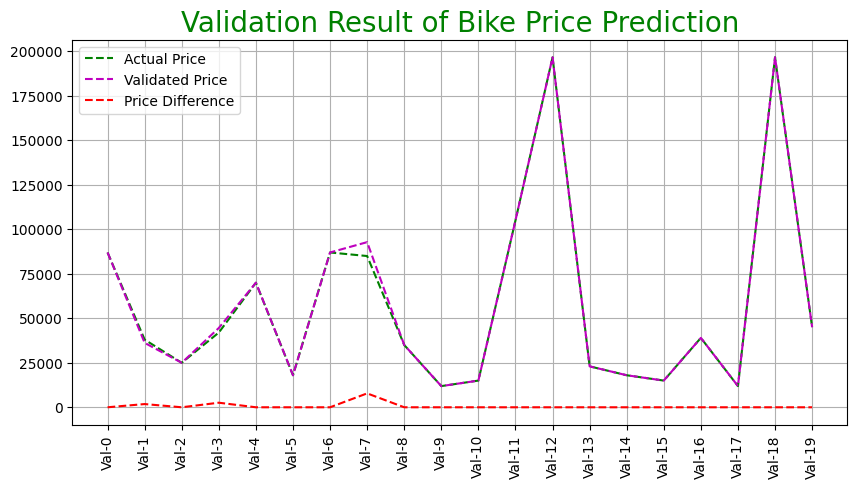

,Actual,Validated,Difference
Observation,,,
Val-0,87000,87000.0,0.0
Val-1,38000,36195.0,1805.0
Val-2,25000,25000.0,0.0
Val-3,42000,44566.0,2566.0
Val-4,70000,70000.0,0.0
Val-5,18000,18000.0,0.0
Val-6,87000,87000.0,0.0
Val-7,85000,92810.0,7810.0
Val-8,35000,35000.0,0.0


In [ ]:
vldprc,actprc,dff=[],[],[]
valsl=[]
obs=20
for v in range(obs):
    valprd=finreg_model.predict([X_bkts.iloc[v]])
    vldprc.append(valprd[0])
    actprc.append(y_bkts.iloc[v])
    dff.append(abs(y_bkts.iloc[v]-valprd)[0])
    valsl.append("Val-{}".format(v))
valprcdf=pda.DataFrame({
    "Observation":valsl,
    "Actual":actprc,
    "Validated":vldprc,
    "Difference":dff
})
valprcdf=valprcdf.set_index("Observation")
print("Validation R2",round(metrics.r2_score(valprcdf['Actual'],valprcdf['Validated']),4)*100)
print("Validation MAE",metrics.mean_absolute_error(valprcdf['Actual'],valprcdf['Validated']))
print("Validation MSE",metrics.mean_squared_error(valprcdf['Actual'],valprcdf['Validated'],squared=True))
matpl.figure(figsize=(10,5))
matpl.title("Validation Result of Bike Price Prediction",fontsize=20,color="g")
matpl.plot(valprcdf['Actual'],"--g",label="Actual Price")
matpl.plot(valprcdf['Validated'],"--m",label="Validated Price")
matpl.plot(valprcdf['Difference'],"--r",label="Price Difference")
matpl.xlabel("",fontsize=16,color="g")
matpl.xticks(rotation=90)
matpl.ylabel("",fontsize=16,color="g")
matpl.legend(loc='best')
matpl.grid()
matpl.show()
valprcdf